<a href="https://colab.research.google.com/github/russellw999/PyTorch-Tutorial-YouTube-Codemy/blob/master/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer ( 4 features of a flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output ( 3 classes of iris flowers )

  def __init__(self, in_features=4, h1=8, h2=9, out_features = 3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/geetharamson/Fisher-s-Iris-Dataset/refs/heads/master/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = my_df.groupby(['Species']).count()
df

,Sepal_length,Sepal_width,Petal_length,Petal_width
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [ ]:
# Change last column from strings to integers
my_df['Species'] = my_df.Species.replace('Iris-setosa',0.0)
my_df['Species'] = my_df.Species.replace('Iris-versicolor',1.0)
my_df['Species'] = my_df.Species.replace('Iris-virginica',2.0)
my_df.groupby(['Species']).count()

/tmp/ipython-input-993047322.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['Species'] = my_df.Species.replace('Iris-virginica',2.0)


,Sepal_length,Sepal_width,Petal_length,Petal_width
Species,,,,
0.0,50,50,50,50
1.0,50,50,50,50
2.0,50,50,50,50


In [ ]:
my_df.head(-5)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,2.0
141,6.9,3.1,5.1,2.3,2.0
142,5.8,2.7,5.1,1.9,2.0
143,6.8,3.2,5.9,2.3,2.0


In [ ]:
#my_df = my_df.to_numpy()
# my_df

In [ ]:
# Train Test Split !  Set X, y

#. X is always the feature, y is the outcome

X = my_df.drop('Species', axis=1)
y = my_df['Species']
X
# y


,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# y is the outcome
y

,Species
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [ ]:
# Convert these to numpy arrays
#.  syntax error possible deprecated
# X = X.values
# y = y.values

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [ ]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_train

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [5.2000, 3.5000, 1.5000, 0

In [ ]:
# Convert X features to float tensors
X_test = torch.FloatTensor(X_test)
X_test

tensor([[6.0000, 2.2000, 5.0000, 1.5000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [4.7000, 3.2000, 1.3000, 0

In [ ]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
y_test


tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

In [ ]:
# Set the criterion of model to measure the error,
# how far off the predictions are from criterion
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer,
# lr = learning rate ( if error doesn't go down after a bunch of iterations  (epocs), lower our learning rate)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



In [ ]:
# Train the model
# Epochs? ( one run thru all the training data in our network)
epochs = 100
losses = []

# Create a history of the losses
# epochs goes from 1 to 100
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train)

    # Measure the loss (how far off the predictions are)
    loss = criterion(y_pred, y_train)

    # Keep Track of losses
    losses.append(loss.detach().numpy())

    # Print every 10 epoch
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    # Backpropagation : take the error rate of forward propagation
    # and feed it backwords through the network
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 0.016802635043859482
Epoch: 10 and loss: 0.015519778244197369
Epoch: 20 and loss: 0.014496986754238605
Epoch: 30 and loss: 0.013443661853671074
Epoch: 40 and loss: 0.012677091173827648
Epoch: 50 and loss: 0.011877342127263546
Epoch: 60 and loss: 0.01128967385739088
Epoch: 70 and loss: 0.010908301919698715
Epoch: 80 and loss: 0.010098334401845932
Epoch: 90 and loss: 0.009513933211565018


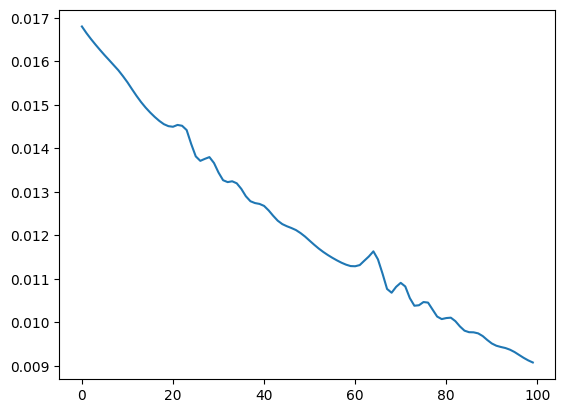

In [ ]:
#V Graph it out
plt.plot(range(epochs), losses)
plt.ylabel=("loss/error")
plt.xlabel=("epochs")


# Video 7 Evaluate Test Data Set on Network

In [ ]:
# Video 7 Evaluate Test Data Set on Network
with torch.no_grad():     # Basically turn off back propogation
    y_eval = model.forward(X_test)   # X_test are features from our test set, y_eval will be predictions
    loss = criterion(y_eval, y_test) # Find the loss or error
    print(f'Loss: {loss}')


Loss: 0.2781101167201996


In [ ]:
loss

tensor(0.2781)

In [ ]:
#. 150 records with 20 % in training = 30 rows in test set

correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        # will tell us what type of flower our network thinks it is
        print(f'{i+1:2}. {str(data.numpy()):28} {y_val.argmax().item():<4} {y_test[i]}')

 1. [6.  2.2 5.  1.5]            2    2
 2. [6.4 2.8 5.6 2.1]            2    2
 3. [7.7 3.  6.1 2.3]            2    2
 4. [6.1 3.  4.6 1.4]            1    1
 5. [6.8 3.  5.5 2.1]            2    2
 6. [6.1 2.8 4.  1.3]            1    1
 7. [6.3 2.7 4.9 1.8]            2    2
 8. [6.  3.4 4.5 1.6]            1    1
 9. [6.5 3.  5.2 2. ]            2    2
10. [6.8 3.2 5.9 2.3]            2    2
11. [6.1 3.  4.9 1.8]            2    2
12. [5.1 3.4 1.5 0.2]            0    0
13. [4.4 3.  1.3 0.2]            0    0
14. [5.  2.3 3.3 1. ]            1    1
15. [5.1 3.3 1.7 0.5]            0    0
16. [6.3 2.8 5.1 1.5]            1    2
17. [4.8 3.1 1.6 0.2]            0    0
18. [6.  2.7 5.1 1.6]            2    1
19. [4.9 3.1 1.5 0.1]            0    0
20. [4.5 2.3 1.3 0.3]            0    0
21. [5.5 2.4 3.7 1. ]            1    1
22. [6.9 3.2 5.7 2.3]            2    2
23. [5.  3.5 1.6 0.6]            0    0
24. [4.7 3.2 1.3 0.2]            0    0
25. [5.6 2.9 3.6 1.3]            1    1


# Video 8 Evaluate NEW Data on the network

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
with torch.no_grad():
    print(model.forward(new_iris))
    print(model.forward(new_iris).argmax().item())



tensor([ 28.0787,  18.4243, -44.4321])
0


In [ ]:
# newer_iris = torch.tensor([5.9,	3.0,	5.1,	1.8])
newer_iris = torch.tensor([5.0,	3.6,	1.4,	0.2	])

In [ ]:
with torch.no_grad():
    print(model(newer_iris))


tensor([ 30.0199,  19.5604, -47.4478])


# Video 9 Save and Load our Neural network Model

In [ ]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_model.pt')

In [ ]:
# Load the saved Model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [ ]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)